In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
data_with_index = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)
data_with_index.head()


,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            88
H2                               62
PostgreSQL                       61
Redis                            52
Oracle                           50
Ehcache                          41
MariaDB                          34
MS SQL Server                    30
MongoDB                          30
SQLite                           25
Elasticsearch                    22
IBM DB2                          20
Hazelcast                        14
Google Cloud Datastore           14
HBase                            13
Cassandra                        13
Solr                             12
DynamoDB                         12
SAP Adaptive Server              12
Hive                             11
Firebase Realtime                10
Informix                          9
Firebird                          8
Google BigQuery                   8
ClickHouse                        7
PostGIS                           6
Memcached                         6
MS Access                   

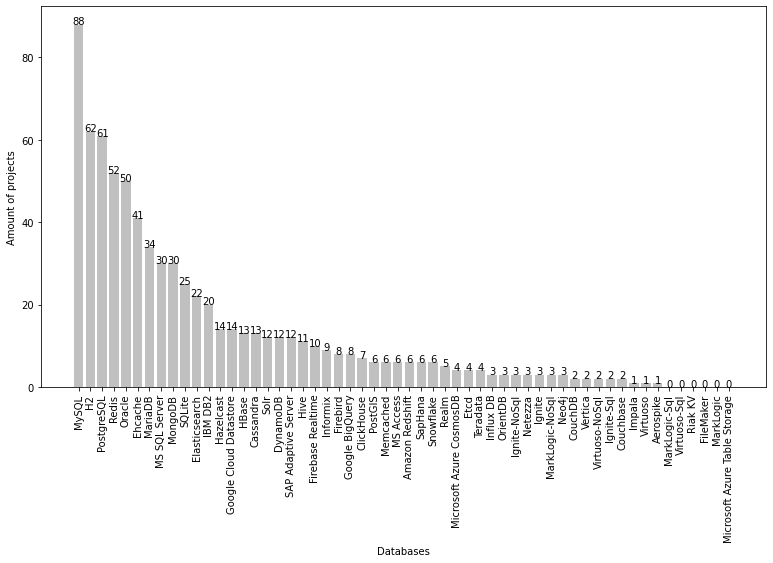

In [4]:
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)
plt.xlabel("Databases")
plt.ylabel("Amount of projects")

#plt.title("Distributions of Databases in Java Projects")
plt.show() 
#add os valores na coluna

In [5]:
data_with_index.Domains.value_counts()

software development         74
media                        44
infrastructure management    40
network                      18
game                         18
monitoring                   18
security                     17
hpc                          15
communication                15
program analysis             15
machine learning             12
file management               7
automation                    7
application container         6
operating system              3
collaboration                 3
scm                           2
cryptocurrency                2
gestão pessoal                2
erp                           2
e-commerce                    1
cms                           1
Name: Domains, dtype: int64

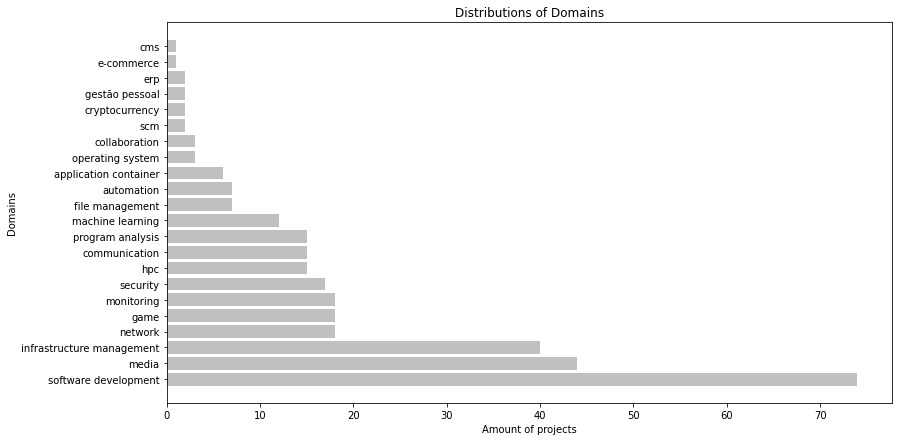

In [6]:
plt.figure(figsize=(13,7))

df = data_with_index.Domains.value_counts()
plt.barh(df.index, df.values, color='silver')
#plt.xticks(rotation=90)

plt.title("Distributions of Domains")
plt.xlabel("Amount of projects")
plt.ylabel("Domains")
plt.show() 

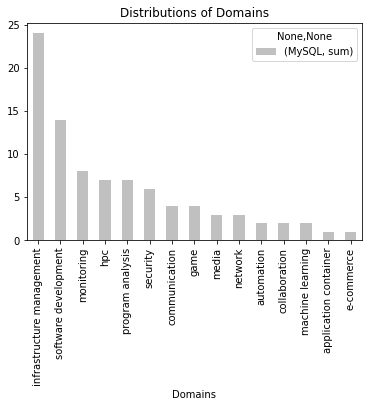

In [7]:
filtered_df = data_with_index.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

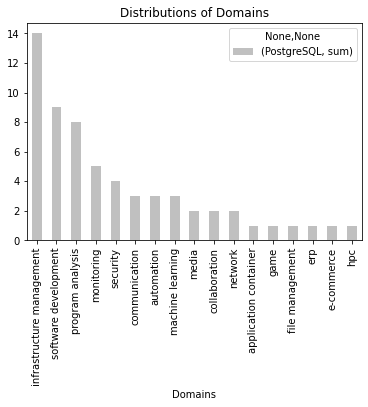

In [8]:

filtered_df = data_with_index.groupby('Domains').agg({'PostgreSQL':['sum']})
filtered_df = filtered_df[filtered_df['PostgreSQL']['sum'] > 0]
result = filtered_df.sort_values(by=('PostgreSQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

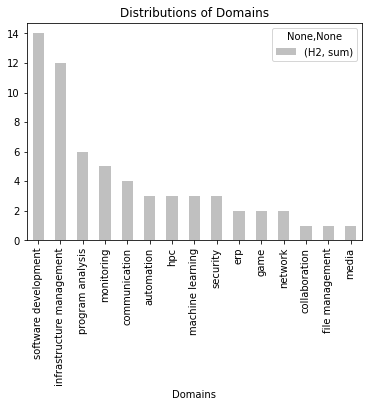

In [9]:

filtered_df = data_with_index.groupby('Domains').agg({'H2':['sum']})
filtered_df = filtered_df[filtered_df['H2']['sum'] > 0]
result = filtered_df.sort_values(by=('H2','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')


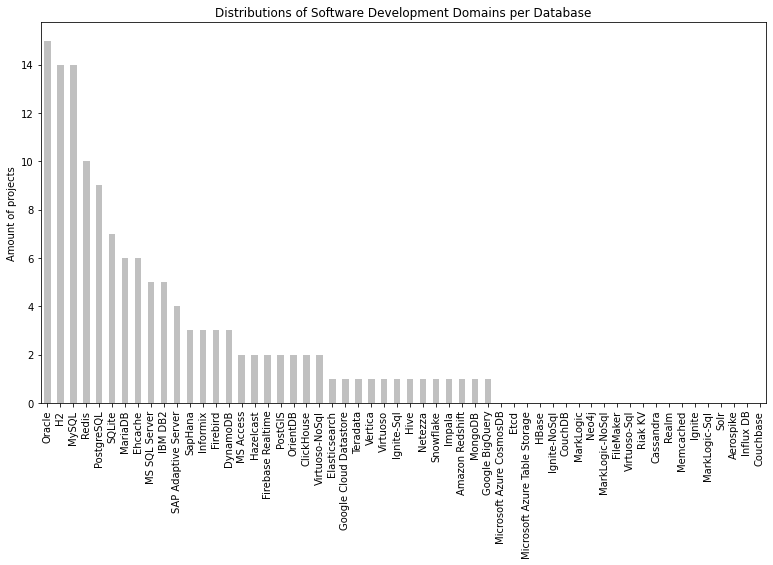

Text(0, 0.5, 'Amount of projects')

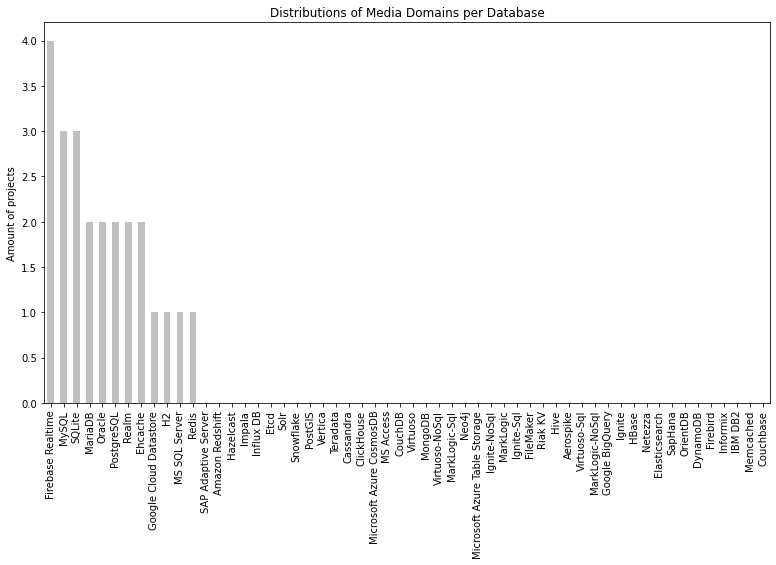

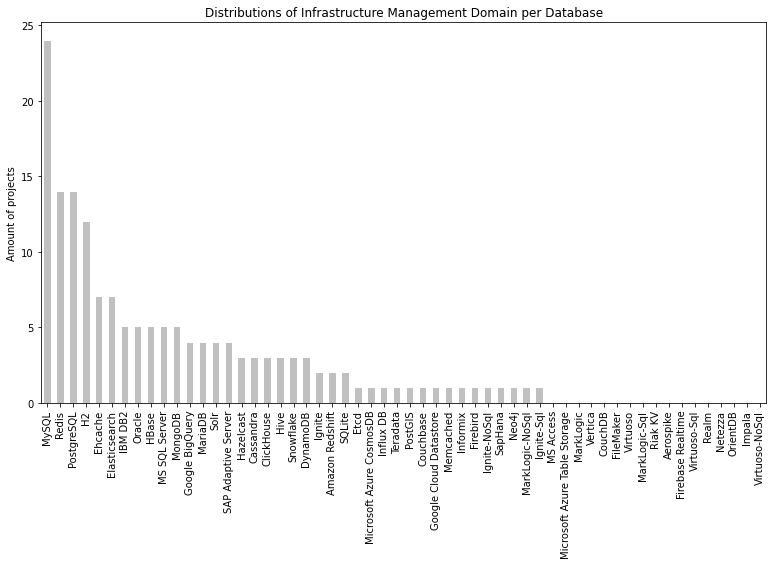

In [10]:


plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='software development'].sum()
df_software_development = df_software_development.iloc[2:].sort_values(ascending=False)
df_software_development.plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Software Development Domains per Database")
plt.ylabel("Amount of projects")
plt.show() 

plt.figure(figsize=(13,7))
media = data_with_index[data_with_index.Domains =='media'].sum()
#print(df_software_development.iloc[2:].sort_values(ascending=False))
media.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver', title = 'Distributions of Domains')
plt.title("Distributions of Media Domains per Database")
plt.ylabel("Amount of projects")
#plt.show() 

plt.figure(figsize=(13,7))
infrastructure_management = data_with_index[data_with_index.Domains =='infrastructure management'].sum()
infrastructure_management.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Infrastructure Management Domain per Database")
plt.ylabel("Amount of projects")
#plt.show()



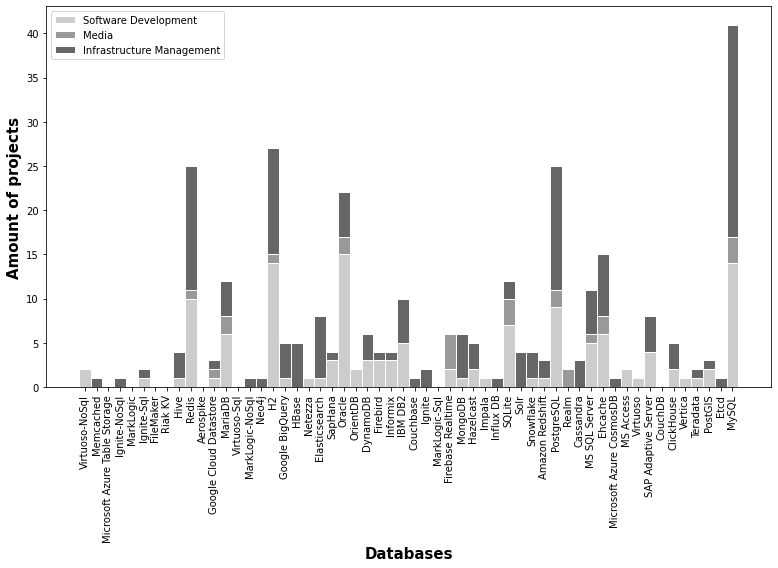

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth =1.0
fig = plt.subplots(figsize =(13, 7))

names_list = data_with_index.columns.to_list()
names_list.remove('Projects')
names_list.remove('Domains')

domains = data_with_index.groupby('Domains')

software_development = domains.get_group('software development')
software_development_sum = software_development.agg([np.sum])
software_development_results = software_development_sum.iloc[: , 2:].values.tolist()

media = domains.get_group('media')
media_sum = media.agg([np.sum])
media_results = media_sum.iloc[: , 2:].values.tolist()

infrastructure_management = domains.get_group('infrastructure management')
infrastructure_management_sum = infrastructure_management.agg([np.sum])
infrastructure_management_result = infrastructure_management_sum.iloc[: , 2:].values.tolist()

br1 = np.arange(len(software_development_results[0]))
plt.bar(br1, software_development_results[0], color='#CCCCCC', edgecolor='white', width = barWidth, label ='Software Development')
plt.bar(br1, media_results[0], bottom=software_development_results[0], color='#999999', edgecolor='white', width = barWidth, label ='Media')
plt.bar(br1, infrastructure_management_result[0], bottom=[i+j for i,j in zip(software_development_results[0], media_results[0])], color='#666666', edgecolor='white', width = barWidth, label ='Infrastructure Management')
plt.xlabel('Databases', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of projects', fontweight ='bold', fontsize = 15)
plt.xticks(br1, names_list, rotation=90)

plt.legend()
plt.show()

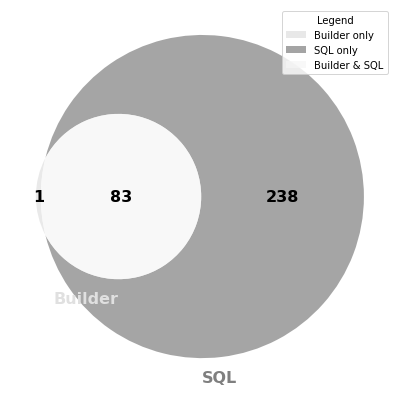

In [12]:
from collections import Counter
from matplotlib_venn import venn2

type_characterization = ['query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)

AB_overlap = 0
A_rest = 0
B_rest = 0

for i in range(len(df)):
    if (df.at[i,'Builder'] == df.at[i, 'SQL']):
        AB_overlap += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'SQL'] == 1):
        B_rest += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'Builder'] == 1):
        A_rest += 1

sets = Counter()
sets['10'] = A_rest
sets['01'] = B_rest
sets['11'] = AB_overlap

labels = ('Builder', 'SQL')
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['#E0E0E0','#7F7F7F']
v = venn2(subsets=sets, set_labels=labels, ax=ax,set_colors= colors, alpha=0.7)

i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(16)
  text.set_fontweight('bold')
  i+=1
  
for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')
  
h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['Builder only','SQL only','Builder & SQL']
ax.legend(handles=h, labels=l, title="Legend",loc='upper right')  

plt.show()